In [1]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

df = pd.read_csv('heart_disease_uci.csv')
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [2]:
print(df.duplicated().sum())

0


In [3]:
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


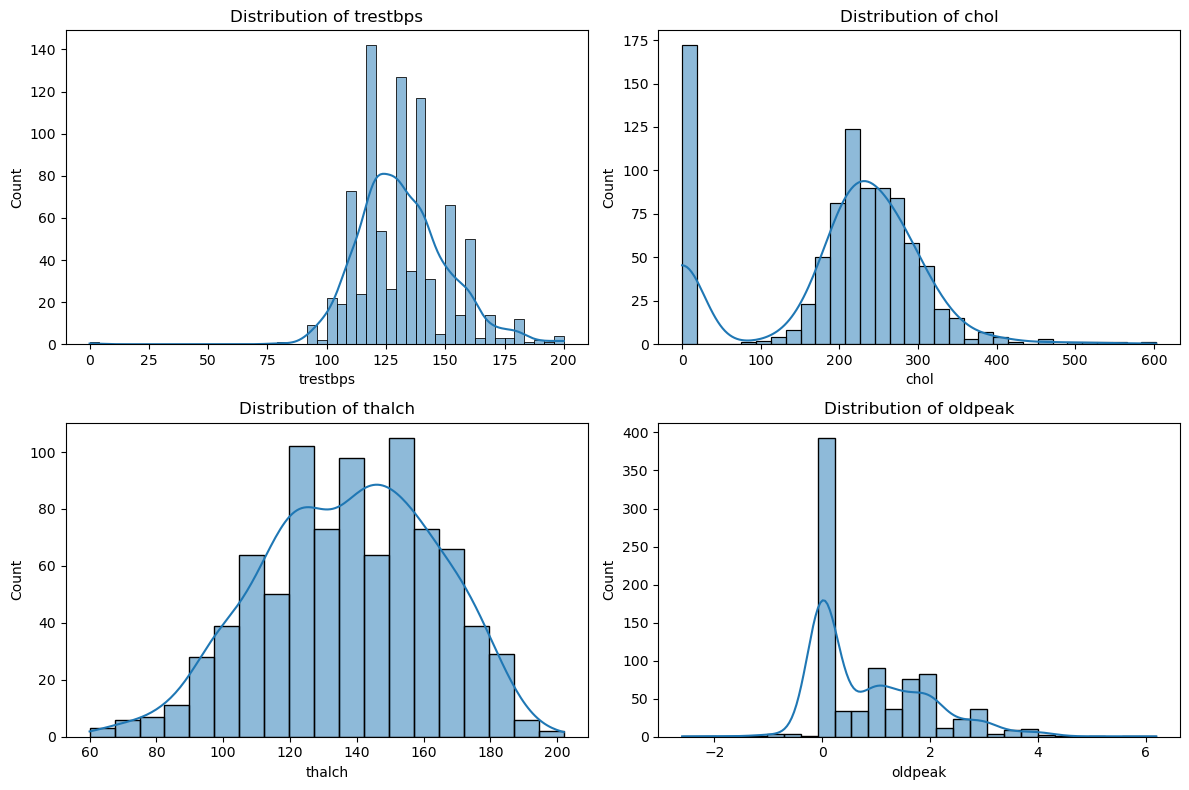

In [4]:
cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
fig , axes = plt.subplots(2, 2 ,figsize=(12,8))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


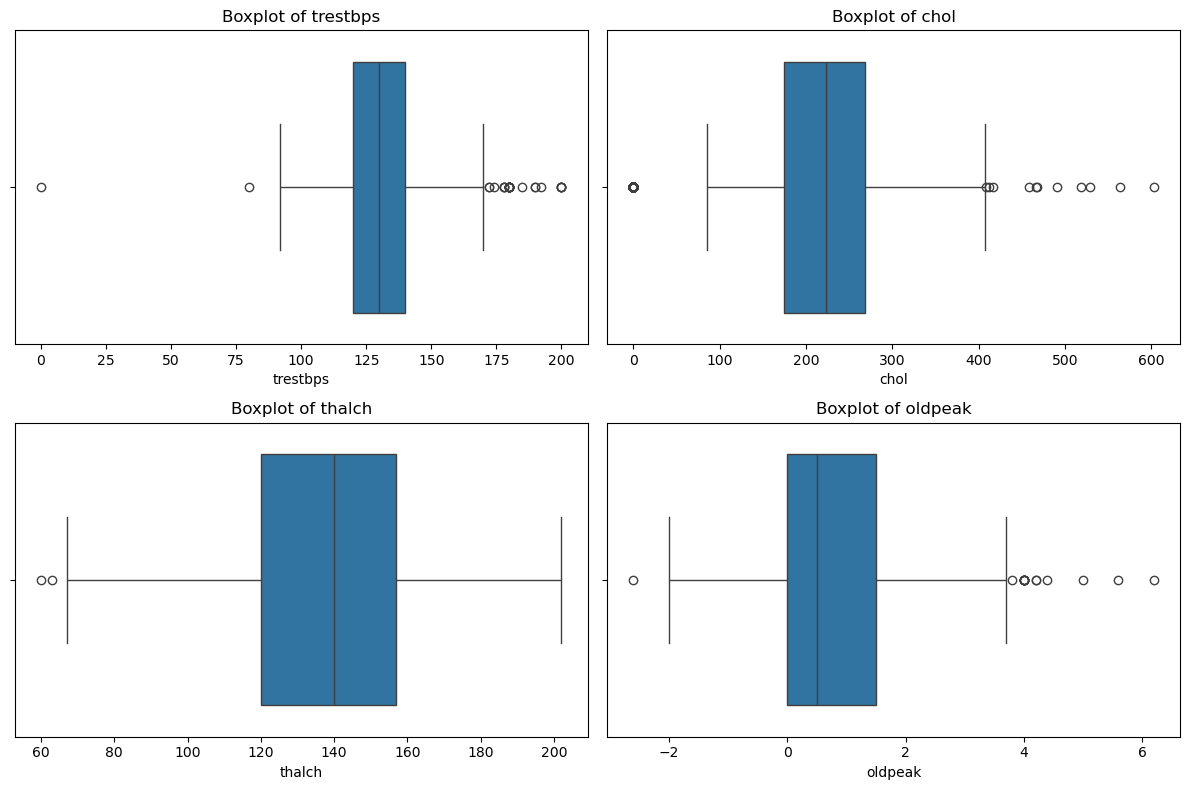

In [6]:
cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [7]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].median())
df['chol'] = df['chol'].fillna(df['chol'].median())
df['thalch'] = df['thalch'].fillna(df['thalch'].median())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())
df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])

df['ca'] = df['ca'].fillna(df['ca'].median())
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

C:\Users\ahmed.habib\AppData\Local\Temp\ipykernel_12404\4066219881.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
C:\Users\ahmed.habib\AppData\Local\Temp\ipykernel_12404\4066219881.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].fillna(df['exang'].mode()[0])


num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


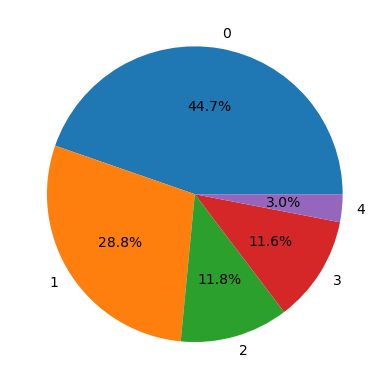

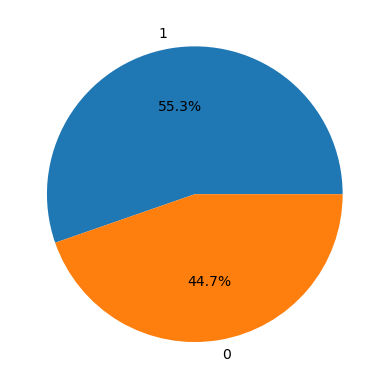

num
0    509
1    509
Name: count, dtype: int64


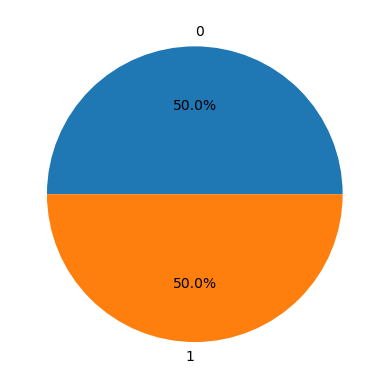

In [8]:
# Data balancing
value_counts = df['num'].value_counts()
print(value_counts)
labels = value_counts.index
counts = value_counts.values
plt.pie(counts, labels= labels, autopct='%1.1f%%')
plt.show()
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
value_counts = df['num'].value_counts()
labels = value_counts.index
counts = value_counts.values
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

from imblearn.over_sampling import RandomOverSampler
input_columns = df.drop('num', axis=1)
class_columns = df['num']
oversampler = RandomOverSampler(random_state=0)
input_columns_resampled , class_columns_resampled = oversampler.fit_resample(input_columns, class_columns)
df = pd.concat([input_columns_resampled, class_columns_resampled], axis=1)
class_distribution = df['num'].value_counts()
print(class_distribution)

value_counts = df['num'].value_counts()
labels = value_counts.index
counts = value_counts.values
plt.pie(counts, labels= labels, autopct='%1.1f%%')
plt.show()


In [9]:
x = df.drop(columns=['id', 'num'])
print(x)

      age     sex    dataset               cp  trestbps   chol    fbs  \
0      63    Male  Cleveland   typical angina     145.0  233.0   True   
1      67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2      67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3      37    Male  Cleveland      non-anginal     130.0  250.0  False   
4      41  Female  Cleveland  atypical angina     130.0  204.0  False   
...   ...     ...        ...              ...       ...    ...    ...   
1013   56    Male    Hungary     asymptomatic     120.0   85.0  False   
1014   67  Female  Cleveland     asymptomatic     106.0  223.0  False   
1015   44    Male  Cleveland      non-anginal     120.0  226.0  False   
1016   43  Female    Hungary  atypical angina     120.0  266.0  False   
1017   50    Male    Hungary     asymptomatic     150.0  215.0  False   

             restecg  thalch  exang  oldpeak        slope   ca  \
0     lv hypertrophy   150.0  False      2.3  downsloping

In [10]:
y = df['num']
print(y)

0       0
1       1
2       1
3       0
4       0
       ..
1013    0
1014    0
1015    0
1016    0
1017    0
Name: num, Length: 1018, dtype: int64


In [11]:
print(x['sex'])

from sklearn.preprocessing import LabelEncoder
labelencoder_gender = LabelEncoder()
x['sex'] = labelencoder_gender.fit_transform(x['sex'])

print(x['sex'])
print(labelencoder_gender.transform(['Male', 'Female']))

0         Male
1         Male
2         Male
3         Male
4       Female
         ...  
1013      Male
1014    Female
1015      Male
1016    Female
1017      Male
Name: sex, Length: 1018, dtype: object
0       1
1       1
2       1
3       1
4       0
       ..
1013    1
1014    0
1015    1
1016    0
1017    1
Name: sex, Length: 1018, dtype: int32
[1 0]


In [12]:
x['fbs'] = x['fbs'].astype(int)
x['exang']  = x['exang'].astype(int)

In [13]:
distinct_values  = np.unique(x['dataset'])
print(distinct_values)

['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

multi_class_columns = ['dataset', 'cp', 'restecg', 'slope', 'thal']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), multi_class_columns)], remainder='passthrough')
x = ct.fit_transform(x)

In [15]:
print(x[0])

[  0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.
  63.    1.  145.  233.    1.  150.    0.    2.3   0. ]


In [16]:
from sklearn.model_selection import train_test_split
x_train , x_val_and_test , y_train, y_val_and_test = train_test_split(x,y, test_size =0.30, random_state=42)
x_val, x_test , y_val , y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.50, random_state=42)
print('X_train.shape:', x_train.shape)
print('X_val.shape  :', x_val.shape)
print('X_test.shape :', x_test.shape)
print('Y_train.shape:', y_train.shape)
print('Y_val.shape  :', y_val.shape)
print('Y_test.shape :', y_test.shape)

X_train.shape: (712, 21)
X_val.shape  : (153, 21)
X_test.shape : (153, 21)
Y_train.shape: (712,)
Y_val.shape  : (153,)
Y_test.shape : (153,)


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
x_test = sc.transform(x_test)

print(x_train)

[[ 1.47599845 -0.39239117 -0.51444498 ... -0.72205784 -0.77297809
  -0.35905511]
 [-0.67750749 -0.39239117  1.94384246 ...  1.38493061 -0.77297809
  -0.35905511]
 [-0.67750749 -0.39239117 -0.51444498 ...  1.38493061  1.24299408
   1.17176666]
 ...
 [-0.67750749 -0.39239117  1.94384246 ...  1.38493061  1.1469954
  -0.35905511]
 [ 1.47599845 -0.39239117 -0.51444498 ...  1.38493061  1.1469954
  -0.35905511]
 [-0.67750749 -0.39239117 -0.51444498 ... -0.72205784 -0.77297809
   1.17176666]]


In [18]:
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

model = Sequential()

input_dim = len(x_train[0])
#model.add(Dense(128, activation='relu', input_dim= input_dim , kernel_regularizer=regularizers.l2(0.000001)))
#model.add(Dropout(0.5)) 
#model.add(Dense(64, activation='relu',input_dim= input_dim , kernel_regularizer=regularizers.l2(0.0001)))
#model.add(Dropout(0.4)) 
model.add(Dense(32, activation='relu' ,input_dim= input_dim , kernel_regularizer=regularizers.l2(0.00001)))
model.add(Dropout(0.4)) 
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model.add(Dropout(0.4)) 
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

C:\Users\ahmed.habib\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,377 (5.38 KB)

 Trainable params: 1,377 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
history =  model.fit(x_train, y_train, batch_size=10, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4697 - loss: 0.7503 - val_accuracy: 0.4902 - val_loss: 0.6934
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4643 - loss: 0.7221 - val_accuracy: 0.6209 - val_loss: 0.6835
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5525 - loss: 0.6876 - val_accuracy: 0.6797 - val_loss: 0.6757
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4958 - loss: 0.6886 - val_accuracy: 0.6732 - val_loss: 0.6699
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5947 - loss: 0.6692 - val_accuracy: 0.6863 - val_loss: 0.6624
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6012 - loss: 0.6671 - val_accuracy: 0.6993 - val_loss: 0.6531
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6869 - loss: 0.6498 - val_accuracy: 0.7190 - val_loss: 0.6403
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6679 - loss: 0.6484 - val_accuracy: 0.7386 - v

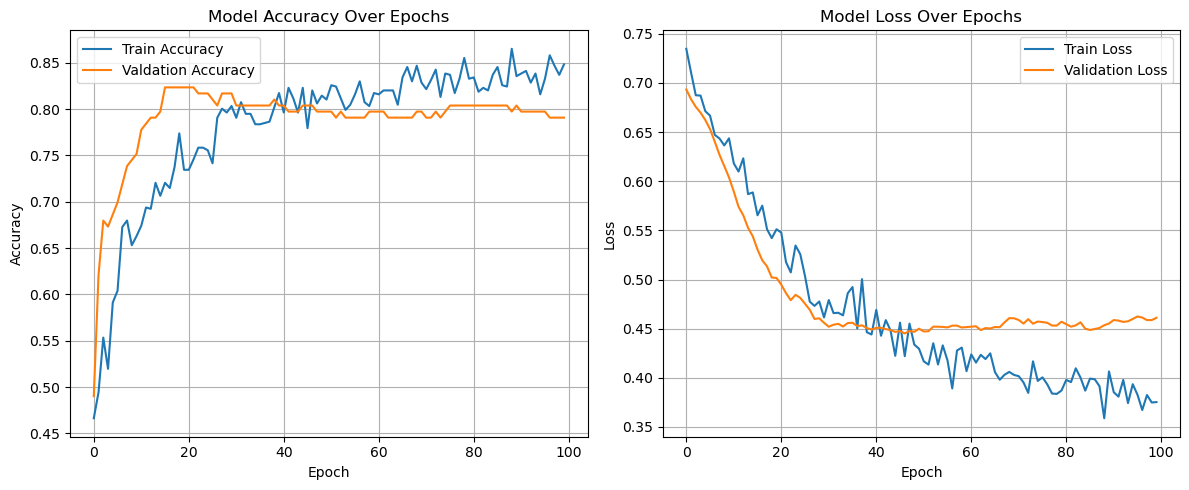

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Valdation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [21]:
evaluation = model.evaluate(x_test, y_test)

print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8874 - loss: 0.2714 
Loss: 0.3015036880970001
Accuracy: 0.8692810535430908


In [22]:
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5)
print(y_pred_binary)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

Accuracy: 0.869281045751634
Precision: 0.9305555555555556
Recall: 0.8170731707317073
F1 Score: 0.8701298701298701


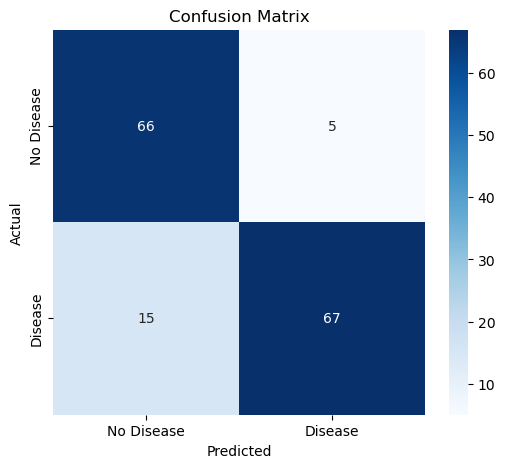

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
model.save('heart_disease.keras')
from joblib import dump

dump(labelencoder_gender, 'heart_disease_label.pkl')
dump(ct, 'heart_disease_column_transformers.pkl')
dump(sc,'heart_disease_standard_scaler.pkl')

# new_patient = np.array([[70, 'Male', 'Cleveland', 'asymptomatic', 160, 286,  False, 'lv hypertrophy' , 108, True, 1.5, 'flat', 3, 'normal']])
from joblib import load
labelencoder_gender_loaded = load('heart_disease_label.pkl')
# new_patient[:, 1] = labelencoder_gender_loaded.transform(new_patient[:,1])

ct_loaded = load('heart_disease_column_transformers.pkl')
# new_patient = ct_loaded.transform(new_patient)
sc_loaded = load('heart_disease_standard_scaler.pkl')
# new_patient = sc_loaded.transform(new_patient)
# print(new_patient)

columns = ['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
           'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
new_patient = pd.DataFrame([[70, 'Male', 'Cleveland', 'asymptomatic', 160, 286,
                              False, 'lv hypertrophy', 108, True, 1.5, 'flat', 3, 'normal']],
                           columns=columns)
# نفس العمليات السابقة
new_patient['sex'] = labelencoder_gender_loaded.transform(new_patient['sex'])
new_patient['fbs'] = new_patient['fbs'].astype(int)
new_patient['exang'] = new_patient['exang'].astype(int)

new_patient = ct_loaded.transform(new_patient)
new_patient = sc_loaded.transform(new_patient)
print(new_patient)

from keras.models import load_model
loaded_model = load_model('heart_disease.keras')

new_prediction_proba = loaded_model.predict(new_patient)
new_prediction = (new_prediction_proba > 0.5)
print(new_prediction)

[[-0.67750749 -0.39239117 -0.51444498 -0.50569944 -0.5578834  -0.22045608
  -1.25315486 -0.48811973  0.65115282 -0.56004744  0.57086298 -0.50131637
   1.76348082  0.54705582  1.52700066  0.78699054 -0.3995111  -1.18814112
   1.38493061  0.66700203  4.2334102 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[ True]]
